Initializing gradient pattern


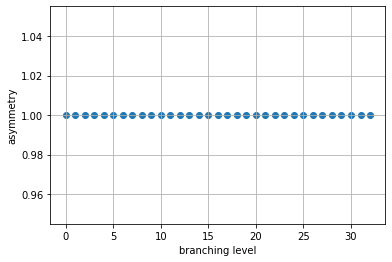

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from cycle_analysis.cycle_tools_coalescence import Coalescence
from cycle_analysis.cycle_custom_pattern import generate_pattern
from cycle_analysis.cycle_tools_simple import construct_networkx_basis

# generate a dummy graph for testing
# put an edge weight distribution on the system, available are random/gradient/bigradient/nested_square
n = 7
unweightedG = nx.grid_graph((n, n, 1))
weightedG = generate_pattern(unweightedG, 'gradient')
pos = nx.get_node_attributes(weightedG, 'pos')

# merge all shortest cycles and create merging tree, then calc asymmetry of the tree's branches
T = Coalescence()

minimum_basis = construct_networkx_basis(weightedG)
cycle_tree = T.calc_cycle_coalescence(weightedG, minimum_basis)
dict_asymmetry = T.calc_tree_asymmetry(cycle_tree)

# plot branching asymmetry in dependence of branching level
x = [(cycle_tree.nodes[n]['pos'][1]-6)/2. for n in dict_asymmetry]
y = [dict_asymmetry[n] for n in dict_asymmetry]

plt.scatter(x,y)
plt.ylabel('asymmetry')
plt.xlabel('branching level')
plt.grid(True)
plt.show()